# Data Project - Stock Market Analysis 

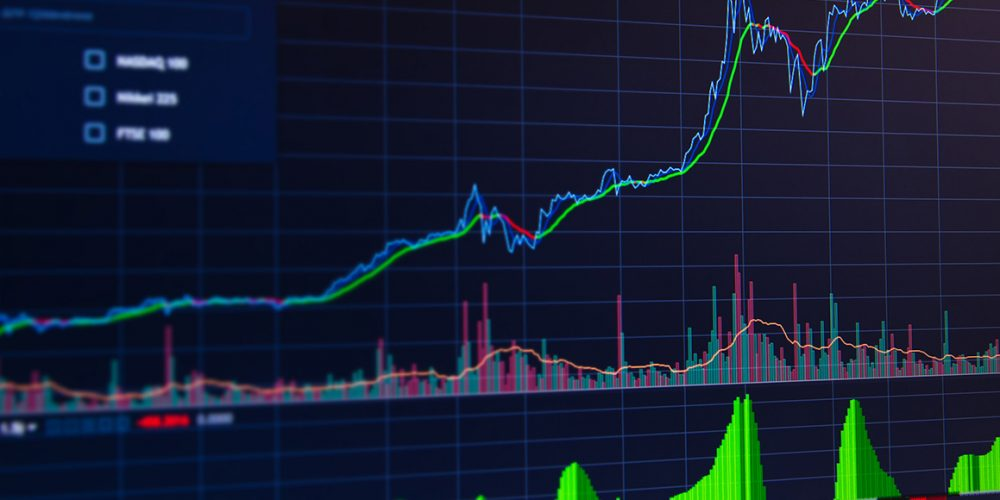

 we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    4.) How much value do we put at risk by investing in a particular stock?
    5.) Technical indicators
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using SVR, RFR,KNN,LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
# library using for data visualization
import pandas as pd  
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

#  reading stock data from yahooFinance
from pandas_datareader.data import DataReader
import yfinance as yf
import pandas as pd

# using plotlib for draw  graphs  
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

# setup layout for  library go 
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), width=800))
colors=px.colors.qualitative.Plotly
# set up style for library searborn , matplotlib 
sns.set_style("whitegrid") 
plt.style.use("fivethirtyeight") 

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL',  'WMT']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'WMT']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, "2018-01-01", end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [27]:
company_list = [AAPL, WMT]
company_name = ["APPLE", "WMT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

Checking Null/NA value and remove it

In [5]:
# kiem tra xem co du lieu is null
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

Drop NAN value

In [6]:
df.dropna(inplace=True)
df.isna().any()

Open            False
High            False
Low             False
Close           False
Adj Close       False
Volume          False
company_name    False
dtype: bool

Import Reliance dataset  using YahooFinance

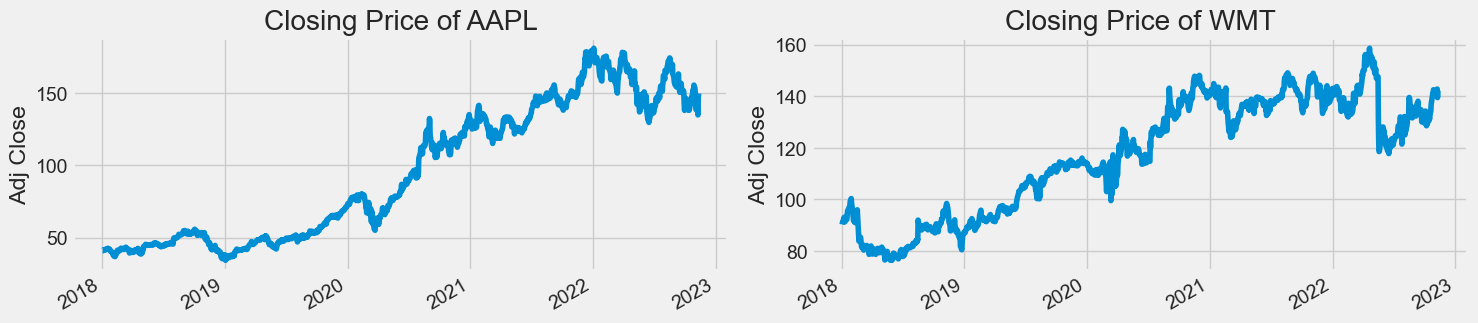

In [28]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

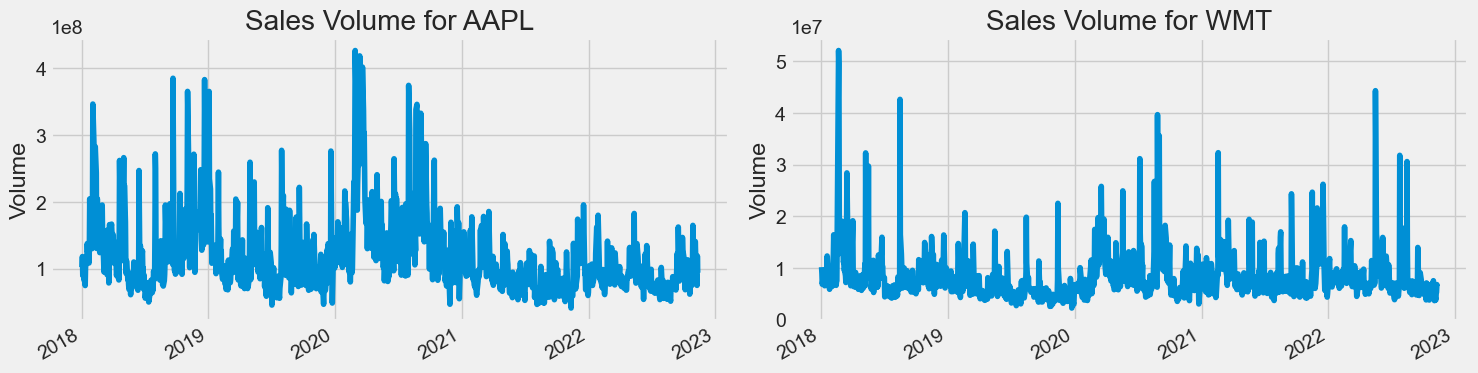

In [29]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now let's go ahead and plot all the additional Moving Averages

In [9]:
# df.groupby("company_name").hist(figsize=(12, 12));

In [10]:
# fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.set_figheight(8)
# fig.set_figwidth(15)

# AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
# axes[0,0].set_title('APPLE')

# AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
# axes[0,1].set_title('AMAZON')

# fig.tight_layout()

# 2. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

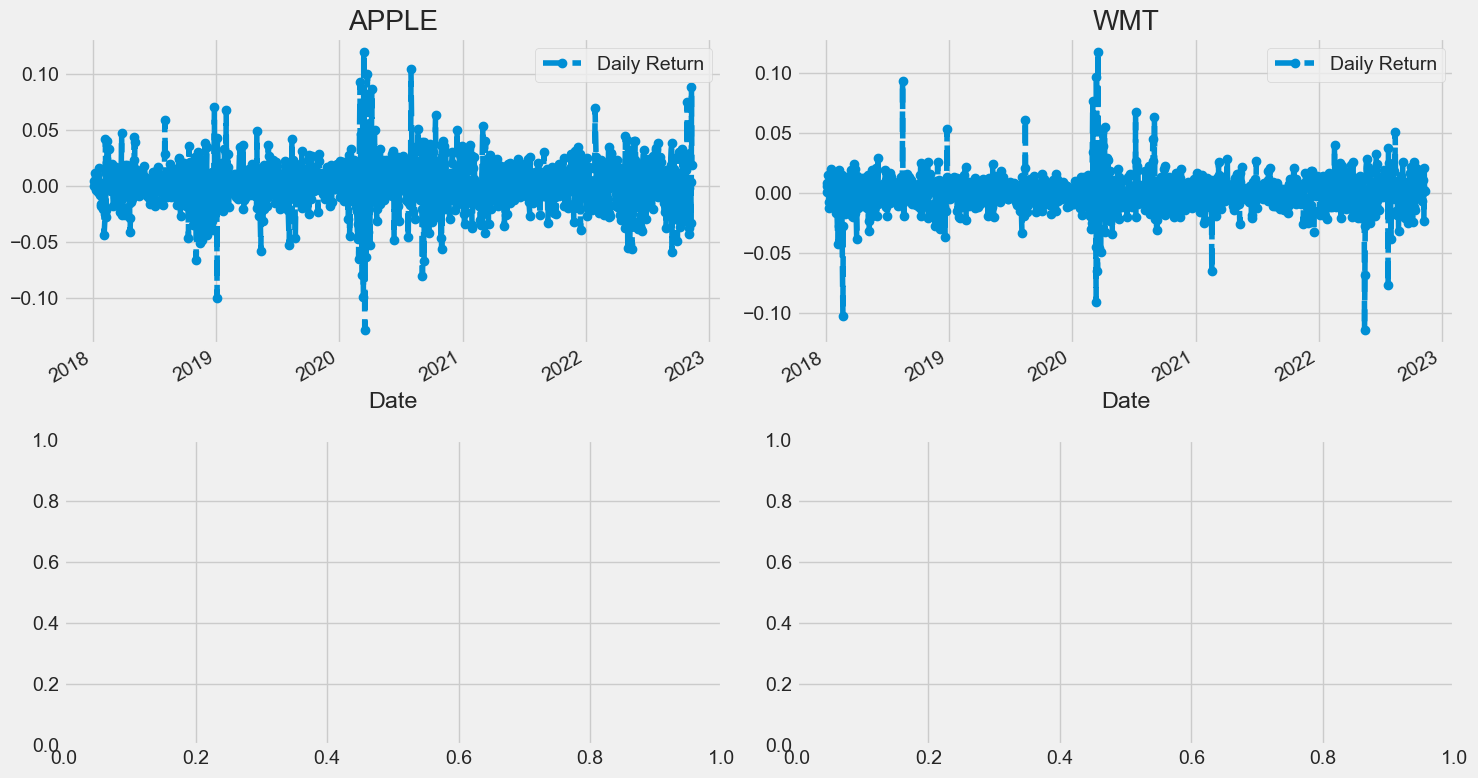

In [45]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

WMT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('WMT')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\loc28\AppData\Local\Temp\ipykernel_11404\20126117.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(),bins=100, color='purple')
C:\Users\loc28\AppData\Local\Temp\ipykernel_11404\20126117.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily 

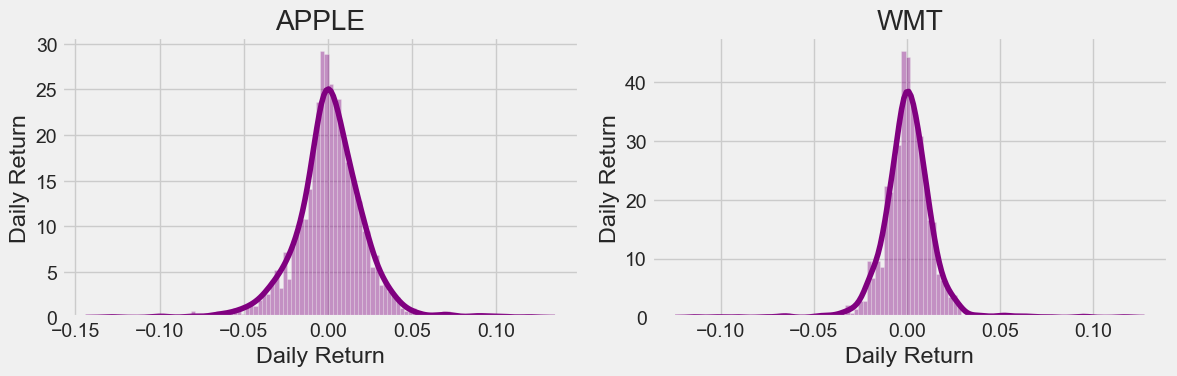

In [47]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(),bins=100, color='purple')
    # company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. How much value do we put at risk by investing in a particular stock?

In [49]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,WMT
Date,,
2021-11-11,147.016754,146.164444
2021-11-12,149.124527,145.436096
2021-11-15,149.134460,144.599472
2021-11-16,150.128677,140.918259
2021-11-17,152.604324,139.707611


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [50]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,WMT
Date,,
2021-11-11,NaN,NaN
2021-11-12,0.014337,-0.004983
2021-11-15,0.000067,-0.005753
2021-11-16,0.006667,-0.025458
2021-11-17,0.016490,-0.008591


There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

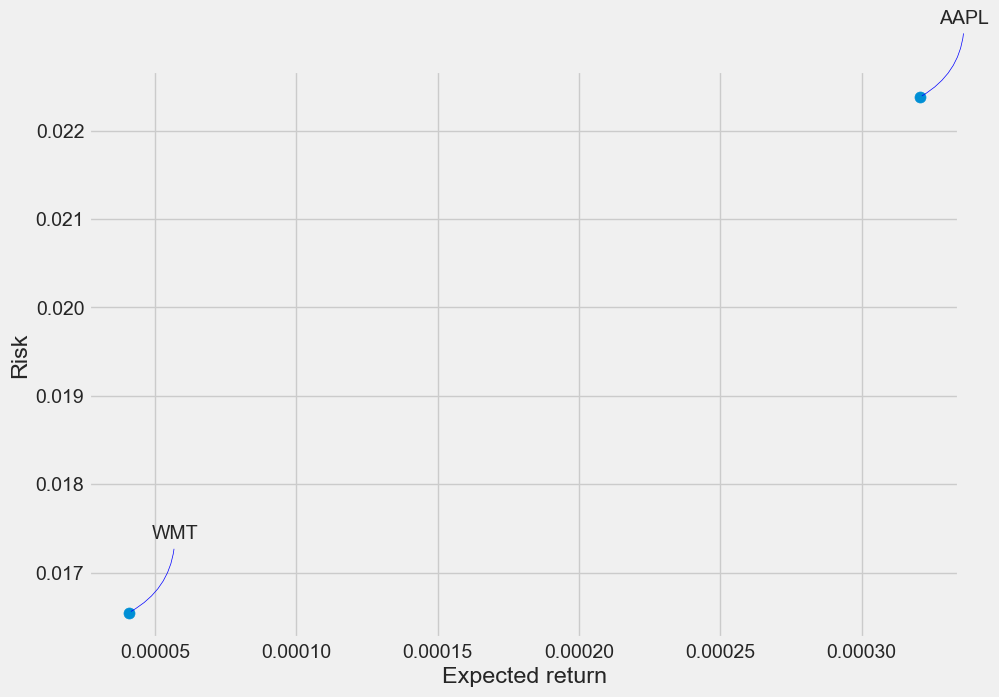

In [51]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 5. Technical indicators

In [3]:
AAPL.reset_index(inplace = True)

In [4]:



def print_chart (df):
    df['EMA_9'] = df['Close'].ewm(9).mean().shift()
    df['SMA_5'] = df['Close'].rolling(5).mean().shift()
    df['SMA_10'] = df['Close'].rolling(10).mean().shift()
    df['SMA_15'] = df['Close'].rolling(15).mean().shift()
    df['SMA_30'] = df['Close'].rolling(30).mean().shift()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_9, name='EMA 9'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_5, name='SMA 5'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_10, name='SMA 10'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_15, name='SMA 15'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_30, name='SMA 30'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close', opacity=0.2))
    fig.show()
   
print_chart(AAPL)


In [8]:
AAPL.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,company_name,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30
1215,2022-10-28,148.199997,157.500000,147.820007,155.740005,155.482086,164762400,APPLE,146.131426,148.642001,145.500002,143.721334,146.273999
1216,2022-10-31,153.160004,154.240005,151.919998,153.339996,153.086044,97943200,APPLE,147.092284,150.336002,147.236002,144.764668,146.441999
1217,2022-11-01,155.080002,155.449997,149.130005,150.649994,150.400497,80379300,APPLE,147.717056,151.114001,148.329001,145.626001,146.403999
1218,2022-11-02,148.949997,152.169998,145.000000,145.029999,144.789810,93604600,APPLE,148.010349,150.776001,149.019000,146.404001,146.195666
1219,2022-11-03,142.059998,142.800003,138.750000,138.880005,138.650009,97918500,APPLE,147.712314,149.912000,149.136000,146.850001,145.905999
1220,2022-11-04,142.089996,142.669998,134.380005,138.380005,138.380005,140716700,APPLE,146.829083,148.728000,148.685001,146.576001,145.443999
1221,2022-11-07,137.110001,139.149994,135.669998,138.919998,138.919998,83374600,APPLE,145.984176,145.256000,147.796001,146.576001,145.042333
1222,2022-11-08,140.410004,141.429993,137.490005,139.500000,139.500000,89908500,APPLE,145.277758,142.372000,146.743001,146.343334,144.647333
1223,2022-11-09,138.500000,138.550003,134.589996,134.869995,134.869995,74789400,APPLE,144.699982,140.142001,145.459001,146.060001,144.238666
1224,2022-11-10,138.500000,143.699997,140.399994,142.899994,142.899994,41280856,APPLE,143.716983,138.110001,144.011000,145.460667,143.739666


RSI =>  Relative Strength Indicator

In [5]:
def releatvive_strength_index(df, n = 14):
    close = df['Close']
    delta = close.diff() # lay nhung gia tri uniquy trong  du lieu close 
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0 ] = 0
    pricesDown[pricesDown >  0 ] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1 + rs))
    return rsi;


AAPL['RSI'] = releatvive_strength_index(AAPL).fillna(0)
fig = go.Figure(go.Scatter(x = AAPL.Date, y = AAPL.RSI, name="RSI"))
fig.show()



MACD =>  Moving Average Convergence Divergence 

In [6]:
# df = AAPL.copy()
EMA_12 = pd.Series(AAPL['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(AAPL['Close'].ewm(span=26, min_periods=26).mean())
AAPL['MACD'] = pd.Series(EMA_12 - EMA_26)
AAPL['MACD_signal'] = pd.Series(AAPL.MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=AAPL.Date, y=AAPL.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.Date, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.Date, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.Date, y=AAPL['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=AAPL.Date, y=AAPL['MACD_signal'], name='Signal line'), row=2, col=1)
fig.show()

In [7]:
df = AAPL.iloc[33:].copy()
df.index = range(len(df))

In [8]:


dataset = df[['EMA_9','SMA_5','SMA_10','SMA_15','SMA_30','RSI','MACD','MACD_signal','Close']]
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]



Split data for training and testing
Ratio for training and testing data is 70:30

In [59]:

test_size  = 0.3

test_split_idx  = int(dataset.shape[0] * (1-test_size))

train_data  = dataset[:test_split_idx].copy()

test_data   = dataset[test_split_idx+1:].copy()
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
    



train_data:  (835, 9)
test_data:  (357, 9)


In [60]:
X_train = train_data.iloc[:,0:8].to_numpy()
y_train = train_data.iloc[:,0].to_numpy()
X_test = test_data.iloc[:,0:8].to_numpy()
y_test = test_data.iloc[:,0].to_numpy()


Normalizing / scaling close value between 0 to 1

In [61]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [62]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

Algorithms

Random Forest Regressor - RFR

In [30]:
from sklearn.ensemble import RandomForestRegressor
# khoi tao doi tuong cua thua toan rf sau do goi ham dua vao train data(feature), y_train chinh la ket qua theo tap test nay (label)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

C:\Users\loc28\AppData\Local\Temp\ipykernel_11496\239946564.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(random_state=0)

In [31]:

test_predict=regressor.predict(X_test)
print("Test data prediction:", test_predict.shape)


Test data prediction: (357,)


Transform back to original form

In [32]:
test_predict = test_predict.reshape(-1,1)
test_predict = scaler.inverse_transform(test_predict)

In [33]:
y_test = scaler.inverse_transform(y_test)

In [34]:
test_predict = test_predict.reshape(-1)
y_test = y_test.reshape(-1)

Evaluation metrices

In [35]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("----------------------------------------------------------------------")
print("Test data explained variance regression score:", explained_variance_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data MGD: ", mean_gamma_deviance(y_test, test_predict))
print("Test data MPD: ", mean_poisson_deviance(y_test, test_predict))

Test data RMSE:  0.6477490507673054
Test data MSE:  0.4195788327699452
Test data MAE:  0.4681893501241572
----------------------------------------------------------------------
Test data explained variance regression score: 0.9972874584105441
----------------------------------------------------------------------
Test data R2 score: 0.9969250241845802
----------------------------------------------------------------------
Test data MGD:  1.8394332296674156e-05
Test data MPD:  0.0027744419188866455


Define a function using for show chart predict 

In [36]:
def showChartPredict(df,test_predict):
    
    predicted_prices = df.loc[test_split_idx:test_split_idx+356].copy()
    predicted_prices['Close'] = test_predict

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                            name='Truth',
                            marker_color='LightSkyBlue'), row=1, col=1)

    fig.add_trace(go.Scatter(x=predicted_prices.Date,
                            y=predicted_prices.Close,
                            name='Prediction',
                            marker_color='MediumPurple'), row=1, col=1)

    fig.add_trace(go.Scatter(x=predicted_prices.Date,
                            y=y_test,
                            name='Truth',
                            marker_color='LightSkyBlue',
                            showlegend=False), row=2, col=1)

    fig.add_trace(go.Scatter(x=predicted_prices.Date,
                            y=test_predict,
                            name='Prediction',
                            marker_color='MediumPurple',
                            showlegend=False), row=2, col=1)
    fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
    # fig.update_traces(marker_line_width=4, opacity=0.8)

    fig.show()
    

In [37]:
showChartPredict(df,test_predict)

Super vector regression - SVR

In [50]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

C:\Users\loc28\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=100.0, gamma=0.1)

In [51]:
test_predict=svr_rbf.predict(X_test)

In [52]:
test_predict = test_predict.reshape(-1,1)

In [53]:
test_predict = scaler.inverse_transform(test_predict)

In [54]:
y_test = y_test.reshape(-1,1)

In [55]:
y_test = scaler.inverse_transform(y_test)

In [56]:
test_predict = test_predict.reshape(-1)
y_test = y_test.reshape(-1)

In [57]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("----------------------------------------------------------------------")
print("Test data explained variance regression score:", explained_variance_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data MGD: ", mean_gamma_deviance(y_test, test_predict))
print("Test data MPD: ", mean_poisson_deviance(y_test, test_predict))

Test data RMSE:  2.394969979316238
Test data MSE:  5.735881201826021
Test data MAE:  1.9010929645904593
----------------------------------------------------------------------
Test data explained variance regression score: 0.9614387021407396
----------------------------------------------------------------------
Test data R2 score: 0.9579633322794271
----------------------------------------------------------------------
Test data MGD:  0.00023734524930181704
Test data MPD:  0.036724808188546565


In [58]:
showChartPredict(df,test_predict)

K-nearest neighgbour - KNN

In [63]:
from sklearn import neighbors

K = 60
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=60)

In [64]:
test_predict=neighbor.predict(X_test)

Transform back to original form

In [65]:
test_predict = test_predict.reshape(-1,1)
test_predict = scaler.inverse_transform(test_predict)

In [66]:
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [67]:
test_predict = test_predict.reshape(-1)
y_test = y_test.reshape(-1)

Evaluation Metrics 

In [68]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("----------------------------------------------------------------------")
print("Test data explained variance regression score:", explained_variance_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data MGD: ", mean_gamma_deviance(y_test, test_predict))
print("Test data MPD: ", mean_poisson_deviance(y_test, test_predict))

Test data RMSE:  2.6235971207080215
Test data MSE:  6.883261851787421
Test data MAE:  2.0109768715294503
----------------------------------------------------------------------
Test data explained variance regression score: 0.9514687591358293
----------------------------------------------------------------------
Test data R2 score: 0.949554500674601
----------------------------------------------------------------------
Test data MGD:  0.0003077204234217407
Test data MPD:  0.045915910977624326


In [69]:
showChartPredict(df,test_predict)

LSTM

Tranform Data

In [ ]:
# scaler du lieu ra de khong bi lech voi gia tri namg trong khoang tu 0-1
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
x0 = scaler.fit_transform(x0)
x1 = scaler.fit_transform(x1)
x2 = scaler.fit_transform(x2)
x3 = scaler.fit_transform(x3)
x4 = scaler.fit_transform(x4)
x5 = scaler.fit_transform(x5)
x6 = scaler.fit_transform(x6)
x7 = scaler.fit_transform(x7)
y = scaler.fit_transform(y)

In [ ]:
# gom cac feature lai thanh 1 mang va tao thanh khong gian 3 chieu de train cho thuat toan LSTM yeu cau 
X = np.stack([x0,x1,x2,x3,x4,x5,x6,x7],axis=2)
X.shape

(1175, 15, 8)

In [ ]:
# X_train, X_test = X[:-480],X[-480:]
# y_train, y_test = y[:-480],y[-480:]
# sau khi chia ra thanh hai phan feature va label voi step la 48 thi ta tien hanh chia tap train va tap test o moi phan theo ty le 
# 70% cho trainig va 30% cho test data
X_train,X_test = splitData(X)
y_train,y_test = splitData(y);


In [ ]:
X_train.shape

(822, 15, 8)

convert an array of values into a dataset 3D matrix 

In [70]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset.iloc[i:(i+time_step), 0:8]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset.iloc[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [71]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (774, 60, 8)
y_train:  (774,)
X_test:  (296, 60, 8)
y_test (296,)


Normalizing / scaling close value between 0 to 1

In [72]:
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [73]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)


LSTM model structure

In [74]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
774/774 [==============================] - 21s 23ms/step - loss: 0.0021
Epoch 2/10
774/774 [==============================] - 19s 25ms/step - loss: 0.0010
Epoch 3/10
774/774 [==============================] - 19s 24ms/step - loss: 6.5593e-04
Epoch 4/10
774/774 [==============================] - 20s 26ms/step - loss: 5.3073e-04
Epoch 5/10
774/774 [==============================] - 19s 24ms/step - loss: 3.4964e-04
Epoch 6/10
774/774 [==============================] - 19s 25ms/step - loss: 3.9880e-04
Epoch 7/10
774/774 [==============================] - 18s 24ms/step - loss: 5.5133e-04
Epoch 8/10
774/774 [==============================] - 19s 25ms/step - loss: 2.1500e-04
Epoch 9/10
774/774 [==============================] - 19s 25ms/step - loss: 2.3893e-04
Epoch 10/10
774/774 [==============================] - 19s 25ms/step - loss: 3.9224e-04


In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           70144     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 121,203
Trainable params: 121,203
Non-trainable params: 0
_________________________________________________________________


In [76]:
test_predict = model.predict(X_test)

10/10 [==============================] - 1s 29ms/step


Transform back to original form

In [77]:
test_predict = test_predict.reshape(-1,1)
test_predict = scaler.inverse_transform(test_predict)

In [78]:
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [79]:
test_predict = test_predict.reshape(-1)
y_test = y_test.reshape(-1)

Evaluation Metrics

In [80]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("----------------------------------------------------------------------")
print("Test data explained variance regression score:", explained_variance_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data MGD: ", mean_gamma_deviance(y_test, test_predict))
print("Test data MPD: ", mean_poisson_deviance(y_test, test_predict))

Test data RMSE:  24.844231861927977
Test data MSE:  617.2358568092372
Test data MAE:  23.651337149609333
----------------------------------------------------------------------
Test data explained variance regression score: 0.48087876810877084
----------------------------------------------------------------------
Test data R2 score: -4.538801054860031
----------------------------------------------------------------------
Test data MGD:  0.021657766036468
Test data MPD:  3.651703093422178


Comparision between original stock close price vs predicted close price

In [82]:
predicted_prices = df.loc[test_split_idx:test_split_idx+295].copy()
predicted_prices['Close'] = test_predict

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                        name='Truth',
                        marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                        y=predicted_prices.Close,
                        name='Prediction',
                        marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                        y=y_test,
                        name='Truth',
                        marker_color='LightSkyBlue',
                        showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                        y=test_predict,
                        name='Prediction',
                        marker_color='MediumPurple',
                        showlegend=False), row=2, col=1)
# fig.update_traces(marker_line_width=4, opacity=0.8)

fig.show()